## Regresion lineal

## Esteban triana aldana

In [9]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#cargamos la base de datos
ruta_archivo = ('car data.csv')
df = pd.read_csv(ruta_archivo)
#visualizamos la base de datos



## analisis exploratorio eda

In [15]:
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [514]:
# Información general del dataset
df.info()

# Descripción estadística
df.describe()

# Verificar si hay valores faltantes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [516]:
# Descripción estadística
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [518]:
# Verificar si hay valores faltantes
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [520]:
# revisamos los tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Procesamiento de datos

In [502]:
# Convertir las variables categóricas a dummies 
df = pd.get_dummies(df, drop_first=True)


In [522]:
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## seleccion de caracteristicas mas relevantes

In [524]:
# Definir X y Y
X = df[['Year', 'Present_Price', 'Kms_Driven']]
y = df['Selling_Price']

## dividir el dataset en train y test

In [526]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenar el modelo

In [528]:
# Crear el modelo de regresión lineal
modmodel = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los valores de la prueba
y_pred = model.predict(X_test)

## calculamos el error cuadratico y coeficiente de determinacion

In [530]:
# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación (R2): {r2}")


Error Cuadrático Medio: 4.010554030280745
Coeficiente de Determinación (R2): 0.8258974489339239


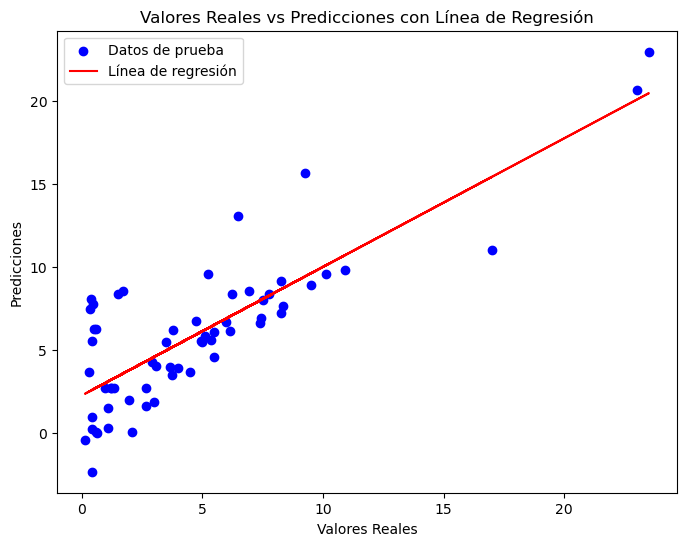

In [532]:
plt.figure(figsize=(8,6))

# Gráfico de dispersión: valores reales vs predicciones
plt.scatter(Y_test, Y_pred, color='blue', label='Datos de prueba')

# Crear la línea de regresión (la línea perfecta de ajuste 1:1)
reg_line = np.poly1d(np.polyfit(Y_test, Y_pred, 1))

# Dibujar la línea de regresión en el gráfico
plt.plot(Y_test, reg_line(Y_test), color='red', label='Línea de regresión')

# Etiquetas y título
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones con Línea de Regresión")
plt.legend()


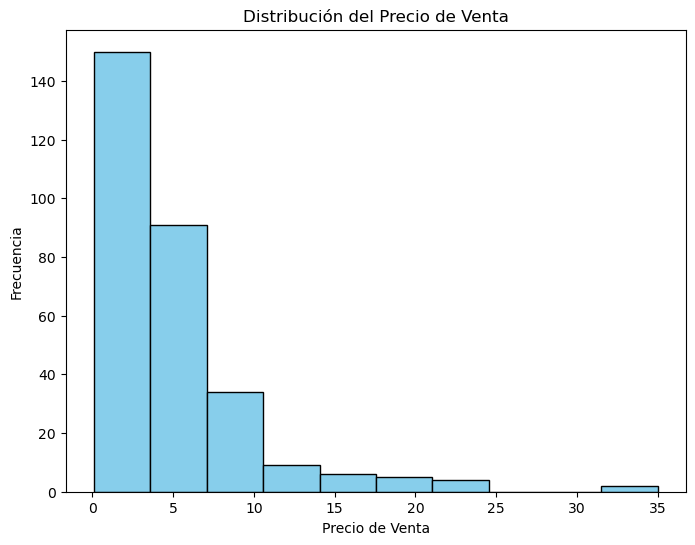

In [534]:

# Histograma: Distribución de los precios de venta
plt.figure(figsize=(8,6))
plt.hist(df['Selling_Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

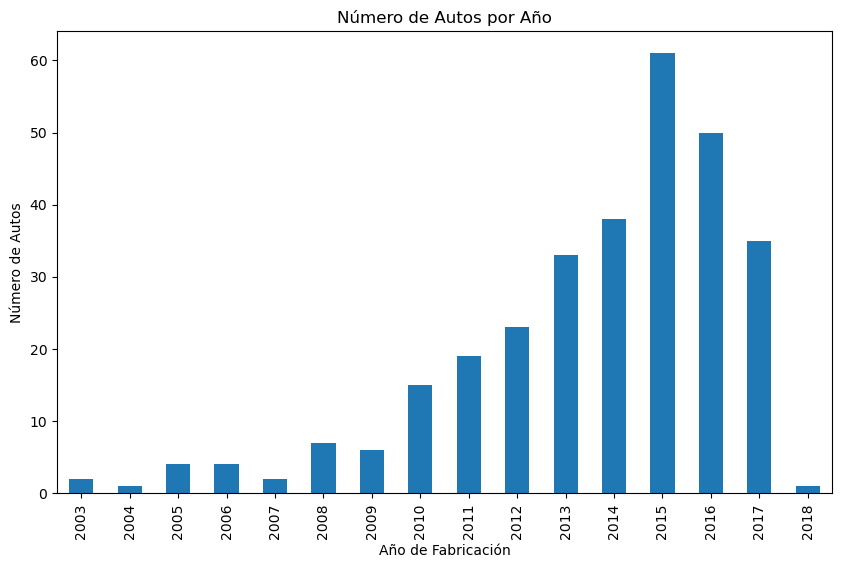

In [542]:
# Diagrama de barras: Número de autos por año
plt.figure(figsize=(10,6))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de Autos por Año')
plt.xlabel('Año de Fabricación')
plt.ylabel('Número de Autos')
plt.show()

In [1]:
# Diagrama circular: Distribución de autos por tipo de transmisión
plt.figure(figsize=(7,7))
transmission_counts = df['Transmission'].value_counts()

# Crear el gráfico circular
fig, ax = plt.subplots()
ax.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Asegurar que el gráfico sea circular
ax.axis('equal')
plt.title('Distribución por Tipo de Transmisión')
plt.show()

NameError: name 'plt' is not defined

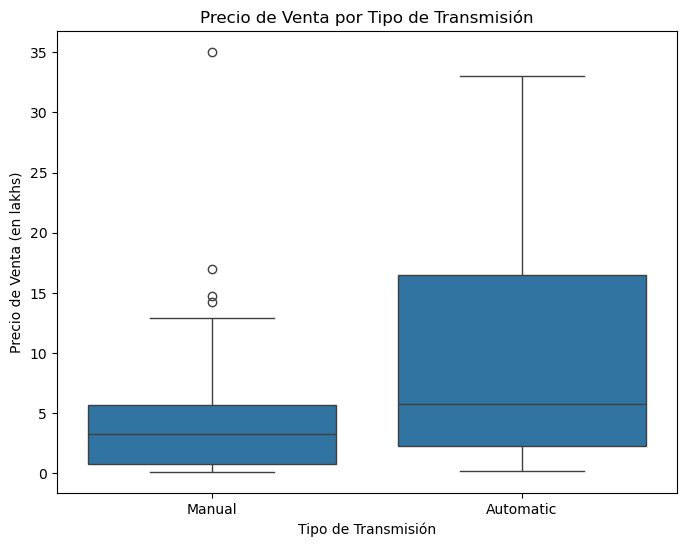

In [546]:
# Boxplot: Precio de venta por tipo de transmisión
plt.figure(figsize=(8,6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Precio de Venta por Tipo de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Precio de Venta (en lakhs)')
plt.show()

In [566]:
from datetime import datetime

car_processed = df.drop('Car_Name', axis=1)

# Calculamos años de los vehiculos con la fecha actual cuanto a pasado.
current_year = datetime.now().year
print("El año actual es {}".format(current_year))
print(f"El mes actual es {datetime.now().month}")
print(f"El día actual es {datetime.now().day}")
print(f"La hora actual es {datetime.now().hour}:{datetime.now().minute}:{datetime.now().second}")

car_processed['Age'] = current_year - car_processed['Year']
car_processed.head(20)

El año actual es 2024
El mes actual es 10
El día actual es 23
La hora actual es 1:1:58


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
5,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,6
6,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,9
7,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,9
8,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,8
9,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,9
